In [1]:

import pandas as pd


In [2]:
dataset = pd.read_csv(r"D:\Nupur\MachineLearning\HandsOnML_Practice\Dataset\housing\housing.csv")

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
import matplotlib.pyplot as plt

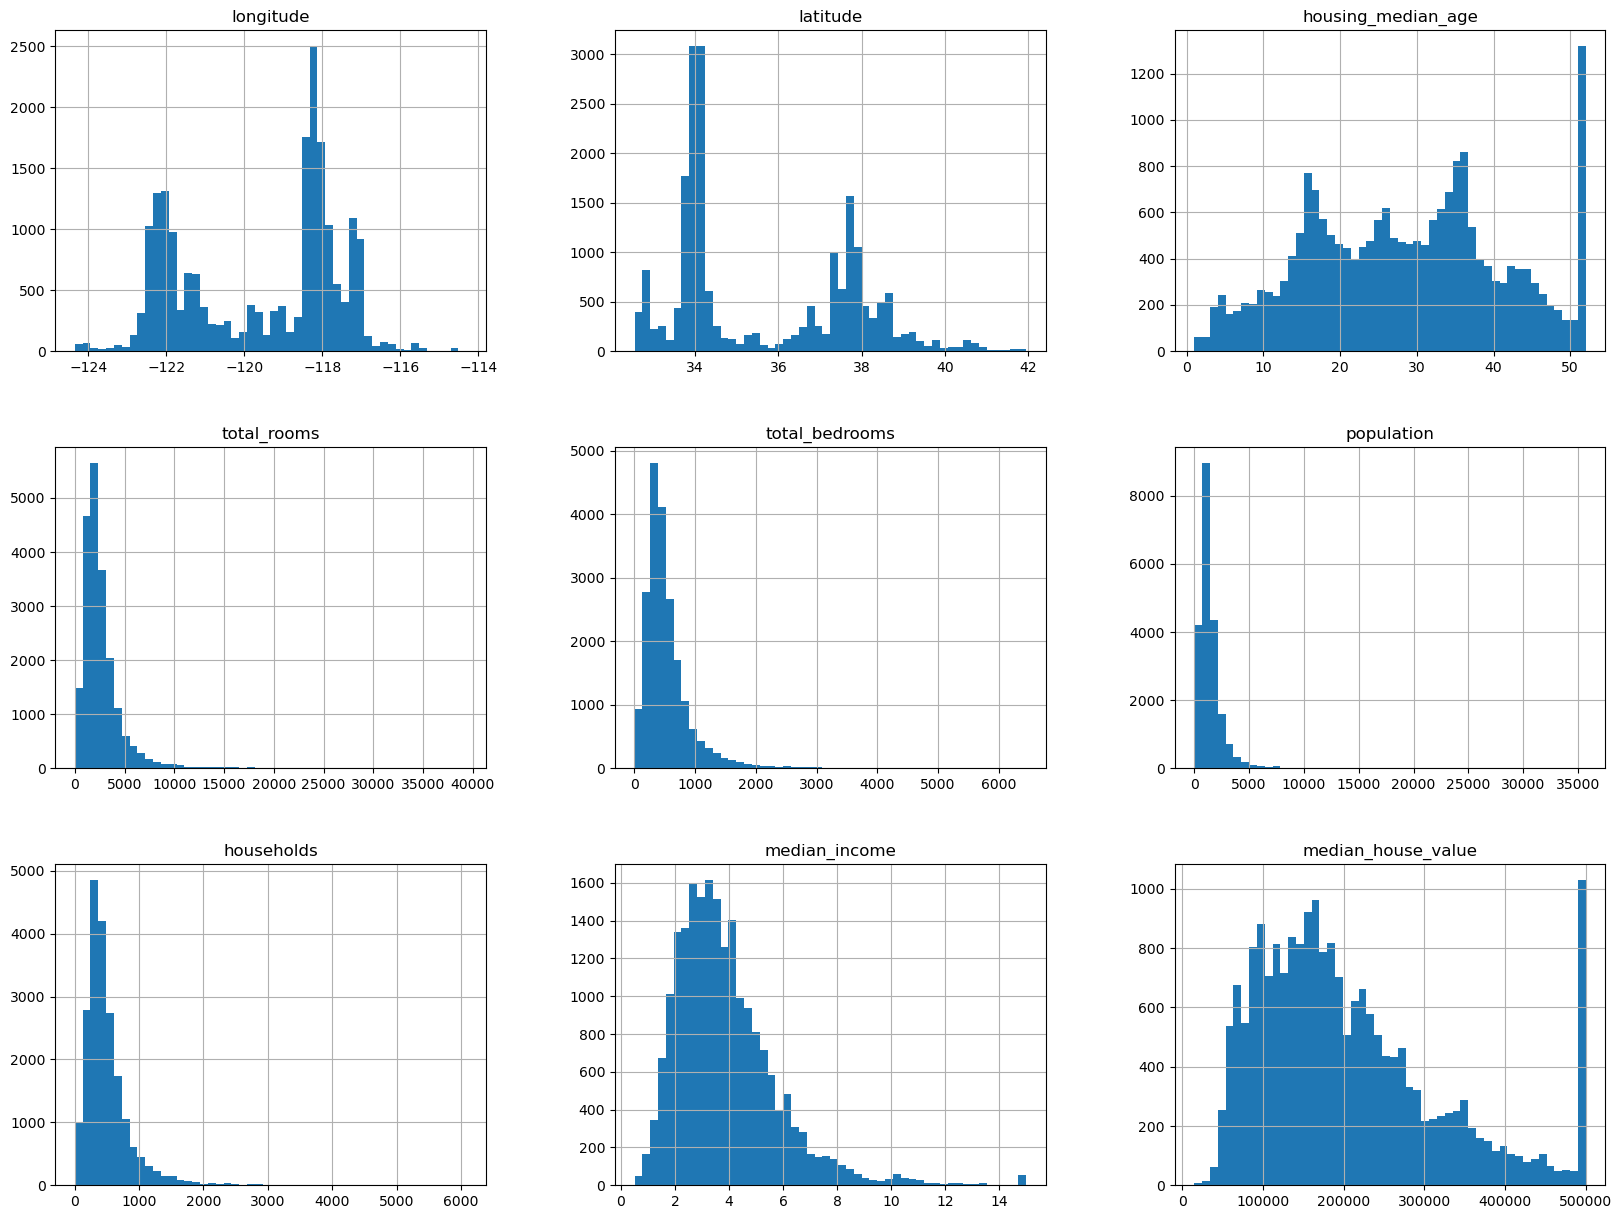

In [8]:
# find patterns in numerical columns in the dataset
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
import numpy as np

In [10]:


def split_train_test(data: pd.DataFrame(), test_ratio: float ):
    ''' This function splits dataframe in the given test_ratio
      ratio to create train set and test set
      params: data, test_ratio
      return: train and test dataframes'''
    
    shuffled_indices = np.random.permutation(len(data)) #array([16721, 18944,  3136, ...,  8051,  1940,  1314])
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[: test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(dataset, 0.2)
print(str(len(train_set)) + " training data and " + str(len(test_set)) + " test data ")

16512 training data and 4128 test data 


In [12]:
#  To guarantee the data in the test set will not be used in the training set
#  when the dataset is refreshed, use each instance’s identifier to decide 
# whether or not it should go in the test set
# you could compute a hash of each instance’s identifier, keep only the last
# byte of the hash, and put the instance in the test set if this value is lower or equal to
# 51 (~20% of 256)

import hashlib

def test_set_check(identifier, test_ratio , hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
dataset.head(2)
# No index in the given dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [14]:
dataset['id'] = dataset['longitude'] * 1000 + dataset['latitude']
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14


In [15]:
train_set, test_set = split_train_test_by_id(dataset, 0.2, 'id')

In [16]:
train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14


In [17]:
#  the splitting can be done easily by importing train_test_split from sklearn

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state= 42)

Stratified sampling: the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.

In [18]:
'''The following code creates an income category
attribute by dividing the median income by 1.5 (to limit the number of income cate‐
gories), and rounding up using ceil (to have discrete categories), and then merging
all the categories greater than 5 into category 5'''

dataset['income_category'] = np.ceil(dataset['median_income']/1.5)
dataset['income_category'].where(dataset['income_category'] < 5, 5.0, inplace=True)

In [19]:
dataset.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5.0


Stratified sampling is a sampling method where the proportions of classes in the dataset are preserved in both the training and testing sets. This ensures that the distribution of the target variable (in this case, 'income_category') remains similar in both sets.

In [20]:
# Stratified sampling on income category

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 42)

for train_index, test_index in split.split(dataset, dataset['income_category']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42): 

Here, an instance of StratifiedShuffleSplit is created with the following parameters:

n_splits=1: 

It means that only one split will be performed (one training set and one test set).


test_size=0.2:

 It specifies that the size of the test set will be 20% of the whole dataset.


random_state=42:

 It sets the random seed for reproducibility. Using the same random state ensures that the split will be the same if you run the code again with the same dataset and parameters.



for train_index, test_index in split.split(dataset, dataset['income_category']):: 

This line sets up a loop that will iterate over the indices of the training and test sets generated by the StratifiedShuffleSplit object.


strat_train_set = dataset.loc[train_index]:

 Within the loop, the code uses the training set indices (train_index) to extract the corresponding rows from the original dataset and assigns it to the variable strat_train_set.


strat_test_set = dataset.loc[test_index]: 

Similarly, within the loop, the code uses the test set indices (test_index) to extract the corresponding rows from the original dataset and assigns it to the variable strat_test_set.

In [21]:
dataset['income_category'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

check weather the train and test set are sampled in the same proportion as original dataset


In [22]:
dataset['income_category'].value_counts()/len(dataset)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [23]:
strat_test_set['income_category'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_category, dtype: float64

In [24]:
strat_train_set['income_category'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: income_category, dtype: float64

remove the additional stratification column

In [25]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_category'], axis =1 , inplace=True)

#### Visualize the data

In [26]:
housing = strat_train_set.copy()

<Axes: title={'center': 'High Density Areas'}, xlabel='longitude', ylabel='latitude'>

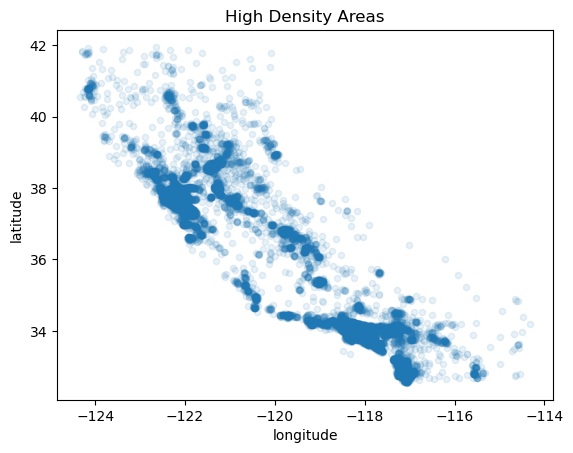

In [27]:
housing.plot(kind= 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1, title='High Density Areas')

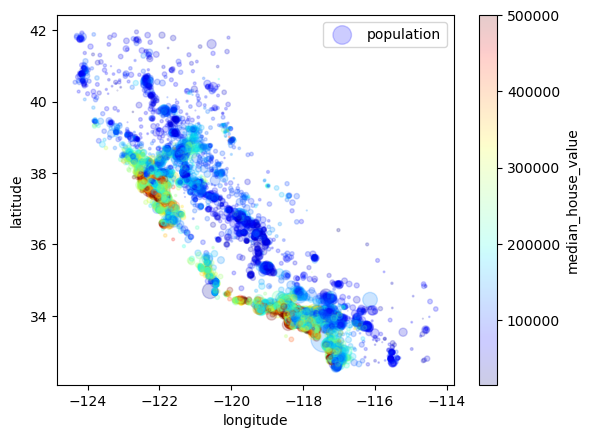

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2,\
             s = housing['population']/100, label='population',\
                c = 'median_house_value', cmap= plt.get_cmap('jet'), colorbar=True )
plt.legend()


#### Correlations

In [29]:
corr_matrix = housing.corr(numeric_only=True)

In [30]:
corr_matrix['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
id                   -0.047665
latitude             -0.142673
Name: median_house_value, dtype: float64

The correlation coefficient only measures linear correlations (“if x
goes up, then y generally goes up/down”). It may completely miss
out on nonlinear relationships 

to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. 

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

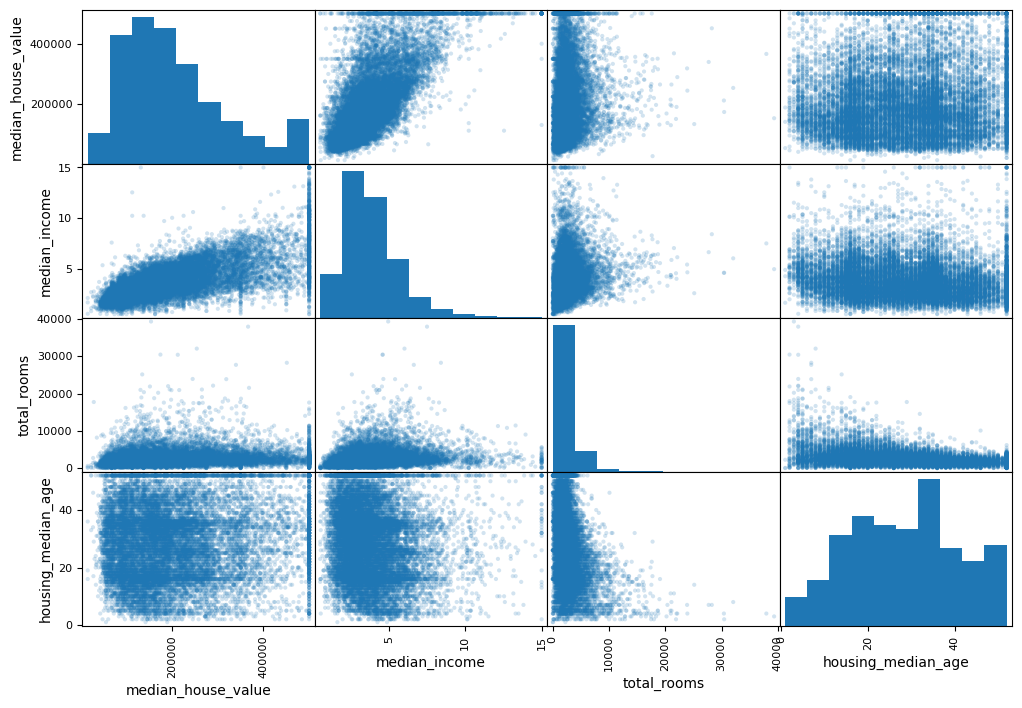

In [31]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8), alpha= 0.2)

<Axes: xlabel='median_income', ylabel='median_house_value'>

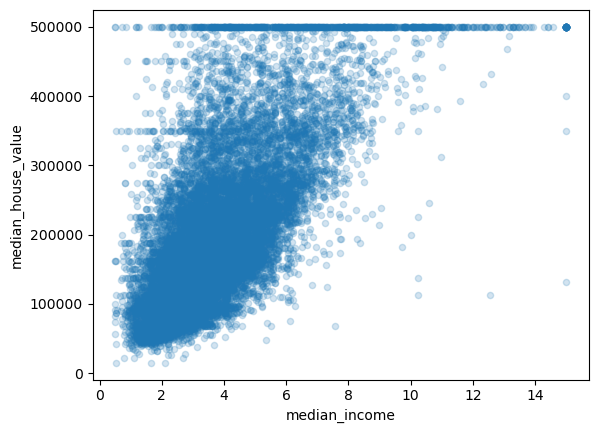

In [32]:
# The most promising attribute to predict the median house value is the median
# income, so let’s zoom in on their correlation scatterplot

housing.plot(kind= 'scatter', x= 'median_income', y='median_house_value', alpha=0.2)

### Experimenting with Attribute Combinations

In [33]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [34]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [35]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_16448\1248221488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
id                         -0.047665
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

### Prepare Data for Machine Learning Algorithms

In [36]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [37]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
id                      0
dtype: int64

#### Missing Data Handling
option 1: drop null values: housing.dropna(subset=["total_bedrooms"])

option 2: drop the column: housing.drop('total_bedrooms', axis= 1)

option 3: fill with median or mean

median = housing['total_bedrooms].median()


housing['total_bedrooms].fillna(median)


In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [39]:
housing_numerical = housing.drop('ocean_proximity', axis=1)

In [40]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
       -1.18475875e+05])

In [42]:
housing_numerical.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
       -1.18475875e+05])

In [43]:
X = imputer.transform(housing_numerical)

In [44]:
housing_train = pd.DataFrame(X, columns= housing_numerical.columns)

### Handling Text and Categorical Attributes

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

housing_categorical = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_categorical)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [46]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. Obviously this is not the case (for
example, categories 0 and 4 are more similar than categories 0 and 1)

Hence, we use One Hot Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
# to convert it to a (dense) NumPy array, just call the toarray() method
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

We can apply both transformations (from text categories to integer categories, then
from integer categories to one-hot vectors) in one shot using the LabelBinarizer
class

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output= False)
housing_cat_1hot = encoder.fit_transform(housing_categorical)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

### Custom Transformers

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3,4,5,6

class CombinedAttributesAdder( BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True) -> None: #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room= False)

housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room,
set to True by default (it is often helpful to provide sensible defaults). This hyperpara‐
meter will allow you to easily find out whether adding this attribute helps the
Machine Learning algorithms or not.

In Python, np.c_ is a convenient function provided by the NumPy library that allows you to concatenate arrays along the second axis (columns) to create a new array. This function is especially useful when you want to combine two or more 1-dimensional arrays into a 2-dimensional array with the same number of rows.


arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])


result = np.c_[arr1, arr2]


array([[1, 4],
       [2, 5],
       [3, 6]])



### Feature Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

scaled_housing_age = scaler.fit_transform(housing[['housing_median_age', 'total_rooms']])
scaled_housing_age


array([[0.54901961, 0.09836191],
       [0.11764706, 0.13516813],
       [0.84313725, 0.0410032 ],
       ...,
       [0.92156863, 0.0178308 ],
       [0.25490196, 0.08009869],
       [0.50980392, 0.02729308]])

### Transformation Pipelines

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = numeric_pipeline.fit_transform(housing_numerical)

For categorical variables


In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names) -> None:
        self.attribute_names = attribute_names
    
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names].values

In [85]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder

numeric_attribs = list(housing_numerical)
category_attribs = ['ocean_proximity']

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(category_attribs)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_binarizer', OneHotEncoder()),  # Use MultiLabelBinarizer instead of LabelBinarizer
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", numeric_pipeline),
    ("categorical_pipeline", categorical_pipeline)
])


In [86]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x17 sparse matrix of type '<class 'numpy.float64'>'
	with 214656 stored elements in Compressed Sparse Row format>

#### Select and Train a Model

In [87]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [88]:
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_cleaned = full_pipeline.transform(sample_data)

print('Predictions: \t', lin_reg.predict(sample_cleaned))

Predictions: 	 [ 85657.89805871 305492.60300915 152056.46504997 186095.70568395
 244550.68220467]


In [89]:
print("Labels:\t", list(sample_labels))

Labels:	 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [90]:
from sklearn.metrics import mean_squared_error

housing_preds = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018873

most districts’
median_housing_values range between $120,000 and $265,000, so a typical predic‐
tion error of $68,628 is not very satisfying. This is an example of a model underfitting
the training data

It is not very satisfying. This is an example of a model underfitting
the training data. When this happens it can mean that the features do not provide
enough information to make good predictions, or that the model is not powerful
enough

Using DecisionTreeRegressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_preds = tree_reg.predict(housing_prepared)

In [92]:

tree_mse = mean_squared_error(housing_labels, housing_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

 Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for train‐
ing, and part for model validation.

### Better Evaluation using Cross-Validation

The following code
performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds, then it trains and evaluates the Decision Tree model 10 times,
picking a different fold for evaluation every time and training on the other 9 folds.
The result is an array containing the 10 evaluation scores

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([72877.74337101, 69131.83389747, 66900.1598679 , 70559.57199361,
       70547.66699382, 79343.92356825, 70012.39423833, 72313.87507725,
       67687.8367983 , 69943.78065189])

Scikit-Learn cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root.

In [94]:
def display_scores(scores):
    print('Scores: ',scores)
    print('Mean: ', scores.mean())
    print('Std deviation: ', scores.std())

In [96]:
display_scores(rmse_scores)

Scores:  [72877.74337101 69131.83389747 66900.1598679  70559.57199361
 70547.66699382 79343.92356825 70012.39423833 72313.87507725
 67687.8367983  69943.78065189]
Mean:  70931.87864578268
Std deviation:  3295.232137634963


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,200, generally ±3,200. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.

In [97]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                              housing_labels, scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.7631233  64114.99139943 67771.17303994 68635.19071655
 66846.13830579 72528.03711721 73997.08130331 68802.33588946
 66443.28831699 70139.80052309]
Mean:  69104.07997350665
Std deviation:  2880.328502420629


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

In [103]:
from sklearn.ensemble import RandomForestRegressor
forest_reg =RandomForestRegressor(n_estimators=200, max_depth = 20, n_jobs=5)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(max_depth=20, n_estimators=200, n_jobs=5)

In [104]:
housing_preds = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19225.64153507271

In [105]:
forest_scores = cross_val_score(forest_reg, housing_prepared,
                              housing_labels, scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [50896.97354363 48621.4782852  46579.49685597 51729.42368394
 47272.41080123 51522.12365852 52428.17754933 49852.62885516
 48048.82670686 53646.96665401]
Mean:  50059.85065938643
Std deviation:  2239.2324892386905


Saving the model

In [106]:
# Method 1
import pickle

with open('./model.pkl', 'wb') as model:
    pickle.dump(forest_reg,model)

with open('./model.pkl','rb') as model:
    forest_reg = pickle.load(model)


### Fine Tune your Model

Get Scikit-Learn’s GridSearchCV to search for you. All you need to
do is tell it which hyperparameters you want it to experiment with, and what values to
try out, and it will evaluate all the possible combinations of hyperparameter values,
using cross-validation

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 
     'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

When you have no idea what value a hyperparameter should have,
a simple approach is to try out consecutive powers of 10 (or a
smaller number if you want a more fine-grained search, as shown
in this example with the n_estimators hyperparameter).

In [111]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [112]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

If GridSearchCV is initialized with refit=True (which is the
default), then once it finds the best estimator using crossvalidation, it retrains it on the whole training set. This is usually a
good idea since feeding it more data will likely improve its perfor‐
mance.

In [116]:
cv_scores = grid_search.cv_results_
cv_scores.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [117]:
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
    print(np.sqrt(-mean_score),params)

63112.37465095203 {'max_features': 2, 'n_estimators': 3}
53011.927609641454 {'max_features': 2, 'n_estimators': 10}
50561.46517151391 {'max_features': 2, 'n_estimators': 30}
59403.96333835014 {'max_features': 4, 'n_estimators': 3}
50774.91495311159 {'max_features': 4, 'n_estimators': 10}
48911.70109351418 {'max_features': 4, 'n_estimators': 30}
57764.07653882107 {'max_features': 6, 'n_estimators': 3}
50968.258517369984 {'max_features': 6, 'n_estimators': 10}
48335.0091442788 {'max_features': 6, 'n_estimators': 30}
56701.495184752515 {'max_features': 8, 'n_estimators': 3}
50943.43830541555 {'max_features': 8, 'n_estimators': 10}
48756.06107230706 {'max_features': 8, 'n_estimators': 30}
59947.36954283158 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51568.38997475557 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58094.624194584736 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50289.272691964 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1